**Задание.**
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные нейросети:
- три входа (𝑥1, 𝑥2, 𝑥3);
- три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
- выход (𝑜1).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [0.5, 0.5, 0.5]
- 𝑏 = 0

Данные нейросети:
- два входа (𝑥1, 𝑥2);
- два нейрона в скрытых слоях (ℎ1, ℎ2);
- два выхода (𝑜1, 𝑜2).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [1, 0];
- 𝑏 = 1.

In [1]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x)) # Функция активации нейрона (сигмоида), используемая для ограничения выхода нейрона между 0 и 1.

#--------------------------------- Первая нейронная сеть ------------------------------------

class Neuron:
    
    def __init__(self,weights,bias): # Инициализация
        self.weights = weights
        self.bias = bias
        
    def feedforward(self,inputs): # Метод, возвращаемый взвешенную сумму входов, смещение и активирует сигмоид.
        total = np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
    
class OurNeuralNetwork1: 
    
    def __init__(self): 
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
        
    def feedforward(self,x): # Принимает входные данные и передает их через скрытые нейроны к выходному нейрону.
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2,out_h3]))
        return out_o1

#--------------------------------- Вторая нейронная сеть ------------------------------------

class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
        self.o2 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1,out_h2]))
        return [out_o1,out_o2]

#----------------------------- Задание нейронов в скрытых слоях. Вывод ------------------------------------------

network1 = OurNeuralNetwork1()
x = np.array([2,2,3])
print(network1.feedforward(x)) # Значение активации выходного нейрона.

network2 = OurNeuralNetwork2()
x = np.array([2,3])
print(network2.feedforward(x))

0.810924976111517
[0.8757270529783324, 0.8757270529783324]


**Задача.** Реализуйте классы нейронных сетей с использованием других функций активации.

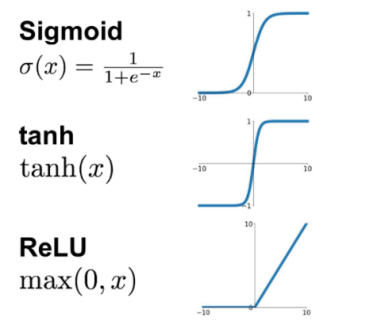

In [ ]:
import numpy as np
import math

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def ReLu(x):
    return max(0,x)

class Neuron:
    
    def __init__(self,weights,bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self,inputs,f):
        total = np.dot(self.weights,inputs) + self.bias
        if f == "sigmoid":
            return sigmoid(total)
        if f == "tanh":
            return tanh(total)
        if f == "relu":
            return ReLu(total)
    
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x,func):
        out_h1 = self.h1.feedforward(x,func)
        out_h2 = self.h2.feedforward(x,func)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]),func)
        return out_o1

network = OurNeuralNetwork()
x = np.array([1,3])
print(network.feedforward(x,"sigmoid"))
print(network.feedforward(x,"tanh"))
print(network.feedforward(x,"relu"))

**Задача.**
Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей. Для классификации можете взять набор данных Ирисов:   
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv  
а для регрессии датасет зависимости заработной платы от опыта работы:   
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv  

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
display(df.head(5))

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
x_df, y_df = df.drop(['variety'], axis=1), df.variety
print(x_df.shape, y_df.shape)

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

mlp_classifier = MLPClassifier(random_state = 123)
mlp_classifier.fit(x_train, y_train)
y_preds = mlp_classifier.predict(x_test)

print(y_preds[:15])
print(y_test[:15])
print("Test accuracy: %.3f"%mlp_classifier.score(x_test, y_test))
print("Trainig accuracy: %.3f"%mlp_classifier.score(x_train, y_train))
print("Loss: ",mlp_classifier.loss_) # Возвращает убыток после завершения процесса обучения.
print("Number of coefs: ", len(mlp_classifier.coefs_)) # Длина массива, где каждый элемент представляет веса, связанные с уровнем i.
print("Number of intercepts: ", len(mlp_classifier.intercepts_)) # Длина массива, где каждый
# элемент представляет собой перехват, связанный с персептронами слоя i.
print("Number of iterations for which estimator ran: ",mlp_classifier.n_iter_) # Количество итераций
print("Name of output layer activation function: ",mlp_classifier.out_activation_) # Имя функции активации выходного слоя.

(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)
['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica']
72     Versicolor
112     Virginica
132     Virginica
88     Versicolor
37         Setosa
138     Virginica
87     Versicolor
42         Setosa
8          Setosa
90     Versicolor
141     Virginica
33         Setosa
59     Versicolor
116     Virginica
135     Virginica
Name: variety, dtype: object
Test accuracy: 0.967
Trainig accuracy: 0.975
Loss:  0.3012607394074939
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  softmax


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
display(df.head(5))

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
from sklearn.neural_network import MLPRegressor

x_df, y_df = df.iloc[:,:-1], df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

mlp_regressor = MLPRegressor(random_state = 123)
mlp_regressor.fit(x_train, y_train)
y_preds = mlp_regressor.predict(x_test)

print(y_preds[:15])
print(y_test[:15])
print("Test R^2 score: %.3f"%mlp_regressor.score(x_test, y_test))
print("Trainig R^2 score: %.3f"%mlp_regressor.score(x_train, y_train))
print("Loss: ", mlp_regressor.loss_)
print("Number of coefs: ", len(mlp_regressor.coefs_))
print("Number of intercepts: ", len(mlp_regressor.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_regressor.n_iter_)
print("Name of output layer activation function: ", mlp_regressor.out_activation_)

(24, 1) (6, 1) (24,) (6,)
[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
7      54445.0
29    121872.0
5      56642.0
26    116969.0
8      64445.0
27    112635.0
Name: Salary, dtype: float64
Test R^2 score: -8.796
Trainig R^2 score: -8.261
Loss:  2988058032.1601596
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  identity


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
